<a href="https://colab.research.google.com/github/pedroblossbraga/Statistics-Python/blob/master/ARIMA_Research_IN_PROGRESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **ARIMA** (AutoRegressive Integrated Moving Average)

# **AR** -> Auto-Regressive term


# **I** -> Integrative term


# **MA** -> Moving Average



When using only the previous values to predict, it is a **Univariate Time Series Forecasting**, and when also using exogenous variables, it is a **Multi-variate Time Series Forecasting**.

<br>



##################################################

## 3.1. Auto-ARIMA example


In [2]:
!pip install pmdarima


     |████████████████████████████████| 1.5MB 8.9MB/s 


In [1]:

# Here’s a quick example of how we can fit an auto_arima with pmdarima:

import numpy as np
import pmdarima as pm
from pmdarima.datasets import load_wineind

# this is a dataset from R
wineind = load_wineind().astype(np.float64)

# fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(wineind, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise


# It’s easy to examine your model fit results. Simply use the summary method:

stepwise_fit.summary()


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3066.760, BIC=3082.229, Fit time=1.604 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3133.376, BIC=3139.564, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=3099.734, BIC=3112.109, Fit time=0.340 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3066.930, BIC=3079.305, Fit time=0.381 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3131.408, BIC=3134.502, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=3088.088, BIC=3100.463, Fit time=0.223 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3067.459, BIC=3086.022, Fit time=2.335 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=3068.000, BIC=3086.563, Fit time=1.796 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=3071.925, BIC=3087.394, Fit time=0.664 seconds
Fit ARIMA: order=(1, 1, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 12)   Log Likelihood               -1527.371
Date:                            Mon, 20 Jan 2020   AIC                           3066.742
Time:                                    01:12:28   BIC                           3085.305
Sample:                                         0   HQIC                          3074.278
                                            - 176                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -100.7331     72.197     -1.395      0.163    -242.236      40.770
ar.L1         -0.5123      0.390     -1.312      0.189      -1.277       0.253
ma.L1         -0.0806      0.404     -0.200      0.842      -0.872       0.711
ma.L2         -0.4430      0.224     -1.978      0.048      -0.882      -0.004
ma.S.L12      -0.4025      0.054     -7.448      0.000      -0.508      -0.297
sigma2      7.663e+06    7.3e+05     10.495      0.000    6.23e+06    9.09e+06
===================================================================================
Ljung-Box (Q):                       48.70   Jarque-Bera (JB):                21.57
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.61
Prob(H) (two-sided):                  0.54   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.14e+14. Standard errors may be unstable.
"""

##################################################################

# **6.1. Understand p, d, and q**

ARIMA models are made up of three different terms:

- p: The order of the auto-regressive (AR) model (i.e., the number of lag observations)


- d: The degree of differencing.


- q: The order of the moving average (MA) model. This is essentially the size of the “window” function over your time series data.


The parameters p and q can be iteratively searched-for with the auto_arima function, but **the differencing term, d, requires a special set of tests of stationarity to estimate.**



In [0]:
from pmdarima.arima.stationarity import ADFTest
from pmdarima.utils import c, diff
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima

import matplotlib.pyplot as plt


##########################################################################################################################################################################
def checa_estacionariedade(arr, return_p_value=False, acf=False):
    """ arr deve ser ts.values. Teste de homocedasticidade (variancia unitaria e media nula) da serie temporal """
    # Testa se deve diferenciar ao nivel alpha=0.5
    # nivel de significancia
    adf_test = ADFTest(alpha=0.05)

    p_val, should_diff = adf_test.should_diff(arr) 
    print(should_diff)

    if acf == True:
      pm.plot_acf(arr)

    if return_p_value == True:
        return p_val, should_diff
    else:
        return should_diff
##########################################################################################################################################################################

def estima_n_diff(arr, test='adf'):
    # Estimate the number of differences using an ADF test:

    n_adf = ndiffs(x=arr, test=test)

    # Or a KPSS test (auto_arima default) test='kpss'

    # Or a PP test if test='pp'

    return n_adf

##########################################################################################################################################################################
def plot_pred(ts, y_pred_arima):
    ############
    x=[]
    for k in range(len(y_pred_arima)):
      x.append(ts.index[-1]+1+k)
    tspred = pd.Series(y_pred_arima)
    tspred.index =x

    plt.plot(ts.index, ts.values, label='ts')
    plt.legend(loc='best')
    plt.scatter(ts.index, ts.values, color='black')
    plt.plot(tspred.index, tspred.values, c='red', label='pred')
    plt.legend(loc='best')
    plt.scatter(tspred.index, tspred.values, color='black')
    plt.show()
    ################

def aplica_arima_variavel(ts, n_previsoes):  
    modelo_auto = auto_arima(ts, seasonal = True, trace = True)
    modelo_auto.summary()
    
    train = ts[:-n_previsoes]
    #test = ts[-n_previsoes:]
    
    modelo_auto.fit(train)

    y_pred_arima = modelo_auto.predict(n_periods = n_previsoes)

    plot_pred(ts, y_pred_arima)

    return y_pred_arima

##########################################################################################################################################################################

def aplica_arima_forecast(ts, n_previsoes):  

    #if checa_estacionariedade(ts.values) == True:
     #   d = estima_n_diff
      #  ts.values = diff(ts.values, lag=1, differences=d)

    modelo_auto = auto_arima(ts, seasonal = True, trace = True)
    modelo_auto.summary()
    
    train = ts
    #test = ts[-n_previsoes:]
    
    modelo_auto.fit(train)

    y_pred_arima = modelo_auto.predict(n_periods = n_previsoes)

    plot_pred(ts, y_pred_arima)

    return(y_pred_arima, modelo_auto)

def aplica_arima_variavel2(ts, n_previsoes):  

    if checa_estacionariedade(ts.values) == True:
        d = estima_n_diff
        ts.values = diff(ts.values, lag=1, differences=d)

    modelo_auto = auto_arima(ts, seasonal = True, trace = True)
    modelo_auto.summary()
    
    train = ts[:-n_previsoes]
    #test = ts[-n_previsoes:]
    
    modelo_auto.fit(train)

    y_pred_arima = modelo_auto.predict(n_periods = n_previsoes)

    plot_pred(ts, y_pred_arima)

    return y_pred_arima

##########################################################################################################################################################################

def aplica_arima_forecast2(ts, n_previsoes):  

    if checa_estacionariedade(ts.values) == True:
        d = estima_n_diff
        ts.values = diff(ts.values, lag=1, differences=d)

    modelo_auto = auto_arima(ts, seasonal = True, trace = True)
    modelo_auto.summary()
    
    train = ts
    #test = ts[-n_previsoes:]
    
    modelo_auto.fit(train)

    y_pred_arima = modelo_auto.predict(n_periods = n_previsoes)

    plot_pred(ts, y_pred_arima)

    return(y_pred_arima, modelo_auto)

In [5]:
import numpy as np
import pandas as pd
from random import randint

x = []
for k in range(100):
  x.append(randint(-100,100))
x = np.array(x)
ts = pd.Series(x)
ts

0    -89
1     84
2     97
3     23
4     -5
      ..
95   -66
96   -58
97    83
98    -1
99   -64
Length: 100, dtype: int64

In [0]:
def cria_ts():
  x = []
  for k in range(100):
    x.append(randint(-100,100))
  x = np.array(x)
  ts = pd.Series(x)
  return ts

True


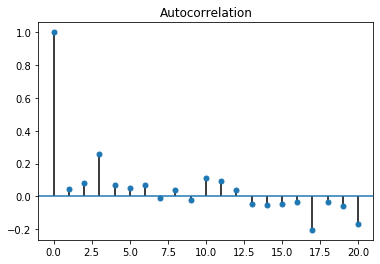

True

In [5]:
checa_estacionariedade(ts, acf=True)

In [6]:
n_adf = ndiffs(ts.values, test='adf')
n_adf

1

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1102.331, BIC=1117.962, Fit time=0.372 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1103.604, BIC=1108.815, Fit time=0.009 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1105.414, BIC=1113.229, Fit time=0.064 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1105.438, BIC=1113.253, Fit time=0.075 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1102.678, BIC=1105.283, Fit time=0.006 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1104.685, BIC=1117.711, Fit time=0.179 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1105.304, BIC=1118.330, Fit time=0.190 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1105.857, BIC=1124.093, Fit time=0.303 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=1104.080, BIC=1122.316, Fit time=0.368 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1104.506, BIC=1114.927, Fit time=0.134 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=1103.487, BIC=1119.118, Fit time=0.211 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1103.858, BIC=1119.489, Fit time=0.153 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=1105.499, BIC=1126.340, Fit time=0.464 seconds
Total fit time: 2.552 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


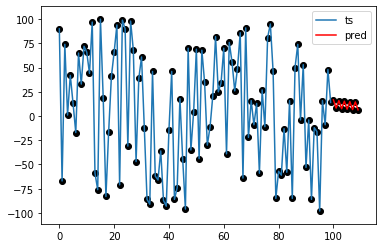

array([16.73097633,  8.25723967, 15.9034545 ,  7.55906742, 15.31102783,
        7.05976395, 14.88682662,  6.70276355, 14.58300138,  6.44758986])

In [7]:
aplica_arima_variavel(ts=ts, n_previsoes=10)

In [0]:
#aplica_arima_variavel2(ts=ts, n_previsoes=10)

In [11]:
n_previsoes=10
ts = cria_ts()


# sem o teste de estacionariedade

modelo_auto = auto_arima(ts, seasonal = True, trace = True)
modelo_auto.summary()

train = ts
#test = ts[-n_previsoes:]

modelo_auto.fit(train)

y_pred_arima = modelo_auto.predict(n_periods = n_previsoes)
print(y_pred_arima, modelo_auto)

# com teste de estacionariedade

if checa_estacionariedade(ts.values) == True:
        d = estima_n_diff
        ts.values = diff(ts.values, lag=1, differences=d)

modelo_auto2 = auto_arima(ts, seasonal = True, trace = True)
modelo_auto2.summary()

train2 = ts
#test = ts[-n_previsoes:]

modelo_auto2.fit(train2)

y_pred_arima2 = modelo_auto2.predict(n_periods = n_previsoes)
print(y_pred_arima2, modelo_auto2)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1102.826, BIC=1118.457, Fit time=0.256 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1098.905, BIC=1104.115, Fit time=0.010 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1100.878, BIC=1108.694, Fit time=0.063 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1100.883, BIC=1108.699, Fit time=0.049 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1096.937, BIC=1099.542, Fit time=0.007 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1100.300, BIC=1110.721, Fit time=0.113 seconds
Total fit time: 0.505 seconds
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=False)
False
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1102.826, BIC=1118.457, Fit time=0.269 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1098.905, BIC=1104.115, Fit time=0.010 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1100.878, BIC=1108.694, Fit time=0.072 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1100.883, BIC=1108.699, Fit time=0.050 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1096.937, BIC=1099.542, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AI

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


False


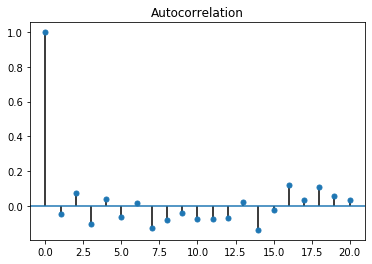

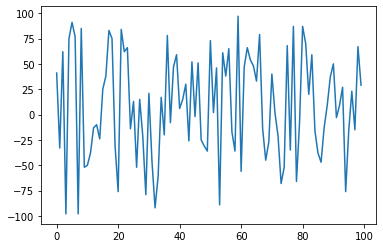

In [12]:
ts = cria_ts()

checa_estacionariedade(ts.values)

pm.plot_acf(ts)
plt.show()

plt.plot(ts)
plt.show()

False


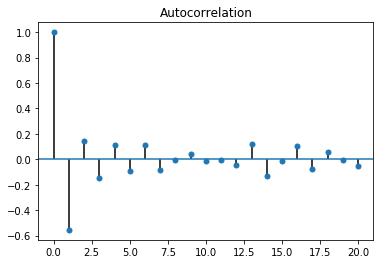

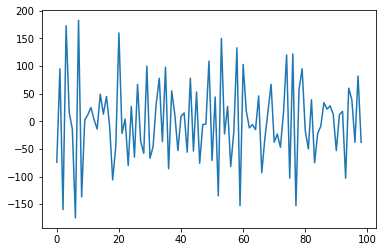

In [13]:
ts_diff = pd.Series(diff(ts.values, lag=1))

checa_estacionariedade(ts_diff.values)

pm.plot_acf(ts_diff)
plt.show()

plt.plot(ts_diff)
plt.show()

In [14]:
ts_diff.values = diff(ts.values, lag=1)
ts_diff

AttributeError: ignored

## **6.1.1. Understanding differencing (d)**


An **integrative term, d**, is **typically only used** in the case of **non-stationary data**. Stationarity in a time series indicates that a series’ statistical attributes, such as mean, variance, etc., are constant over time (i.e., it exhibits low heteroskedasticity).



### A stationary time series is far more easy to learn and forecast from. 
**With the d parameter, you can force the ARIMA model to adjust for non-stationarity on its own**, without having to worry about doing so manually.



The value of d determines the number of periods to lag the response prior to computing differences. E.g.,

In [15]:
from pmdarima.utils import c, diff

# lag 1, diff 1
x = c(10, 4, 2, 9, 34)
diff(x, lag=1, differences=1)
# Returns: array([ -6.,  -2.,   7.,  25.], dtype=float32)


array([-6., -2.,  7., 25.])

## Note that **lag** and **differences** are **not the same!**
<br>
The lag corresponds to the offset in the time period lag, whereas the differences parameter is the number of times the differences are computed. Therefore, e.g., for differences=2, the procedure is essentially computing the difference twice:

In [16]:
x = c(10, 4, 2, 9, 34)

# 1
x_lag = x[1:]  # first lag
x = x_lag - x[:-1]  # first difference
# x = [ -6.,  -2.,   7.,  25.]

# 2
x_lag = x[1:]  # second lag
x = x_lag - x[:-1]
x

array([ 4,  9, 18])

In [17]:
print('## 1')
print(x)
print(x[1:])
print(x[:-1])
print(x[1:]- x[:-1])

print('## 2')
x = x[1:]- x[:-1]
print(x)
print(x[1:])
print(x[:-1])
print(x[1:]- x[:-1])

## 1
[ 4  9 18]
[ 9 18]
[4 9]
[5 9]
## 2
[5 9]
[9]
[5]
[4]



$lag(v) = v[1:] - v[:-1]$



# **6.1.2. Enforcing stationarity**
<br>
The pmdarima.arima.stationarity sub-module defines various **tests of stationarity** for testing a null hypothesis that an observable univariate time series is stationary around a deterministic trend (i.e. trend-stationary).
<br>
**A time series is stationary when its mean, variance and auto-correlation, etc., are constant over time.** Many time-series methods may perform better when a time-series is stationary, since **forecasting values becomes a far easier task for a stationary time series**. 
<br>

# ARIMAs that include differencing (i.e., d > 0) **assume that the data becomes stationary after differencing.**

<br>
This is called difference-stationary. 

<br>

**Auto-correlation plots are an easy way to determine whether your time series is sufficiently stationary for modeling**.

<br>

If the plot does not appear relatively stationary, your model will likely need a differencing term. 


These can be determined by using an Augmented **Dickey-Fuller test**, or various other statistical testing methods. **Note that auto_arima will automatically determine the appropriate differencing term for you by default.**


## **Observar as funções checa_estacionariedade() e estima_n_diff() que criei**


<br>

The easiest way to make your data stationary in the case of ARIMA models is to allow auto_arima to work its magic, estimate the appropriate d value, and difference the time series accordingly. However, **other common transformations for enforcing stationarity include (sometimes in combination with one another):**


- # Square root or N-th root transformations


- # De-trending your time series


- # Differencing your time series one or more times
    
    
- # Log transformations



Note, however, that a transformation on data as a pre-processing stage will result in forecasts in the transformed space.



 When in doubt, let the auto_arima function do the heavy lifting for you. Read more on difference stationarity in this Duke article.


Duke's article:
https://people.duke.edu/~rnau/411diff.htm

$\tilde{y_{t}}=log(y_{t})−log(y_{t}−1)$

<br>

$\hat{y_{t}}+1=y_{t}.exp(\tilde{\hat{y}}_{t}+1)$

<br>


$log(y_{t})=log(y_{0})+\sum_{i=1}^{t}(log(y_{i})−log(y_{i−1}))$

<br>


$y_{t}=y_{0}.exp(\sum_{i=1}^{t}\tilde{y_{i}})$

# On Transformations:


<br>
https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/

<br>

# **Square Root Transform**




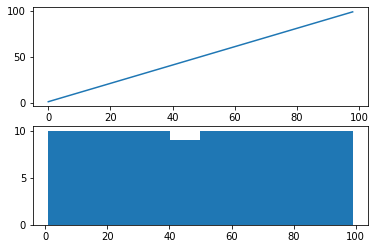

In [18]:
from matplotlib import pyplot
from numpy import sqrt

series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

## **What are AR and MA models**

<br>

## - AR: Auto Regressive:

$Y_{t}$ depends only on its own lags. 
<br>
$Y_{t} = \alpha + \beta_{1}Y_{t-1} + \beta_{2}Y_{t-2}+...+\beta_{p}Y_{t-p}+\epsilon_{1}$

or
$Y_{t} = \alpha + \sum_{i=1}^{p}\beta_{i}Y_{t-i} + \epsilon_{1}$

<br>

## - MA: Moving Average:

$Y_{t}$ depends only on the lagged forecast errors.
<br>
$Y_{t} = \alpha + \epsilon_{1} + \phi_{1}\epsilon{t-1} + \phi_{2}\epsilon_{t-2} + ...+\phi_{q}\epsilon_{t-q}$
or
$Y_{t} = \alpha + \epsilon_{t} + \sum_{i=1}^{q}\phi_{i}\epsilon_{t-i}$

<br>

ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

<br>

---
# **About the differentiating**:
---
<br>

## So how to determine the right order of differencing?

The right order of differencing is the **minimum differencing required to get a near-stationary series** which roams around a defined mean and the ACF plot reaches to zero fairly quick.

<br>

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced. 

<br>

---
# **Augmented Dickey Fuller Test** for stationarity

---

<br>

Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.





In [0]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pmdarima as pm

def dicker_fuller_test(arr):
  result = adfuller(arr)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  pm.plot_acf(arr)
  plt.show()

ADF Statistic: -6.161602
p-value: 0.000000


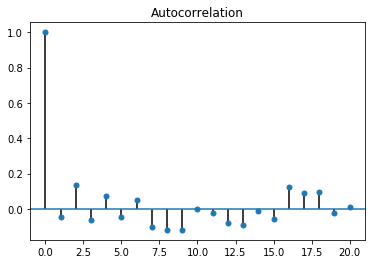

In [20]:
ts = cria_ts()
dicker_fuller_test(ts.values)

## Example of the effect of differentiation:

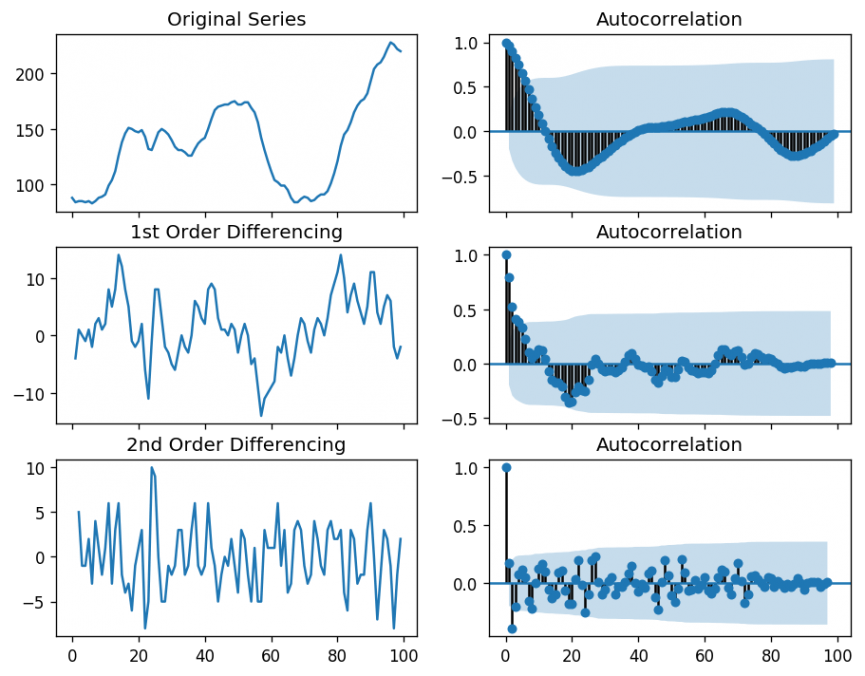

## How to fund the **p** term (order of the AR)

<br>

 You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot. 


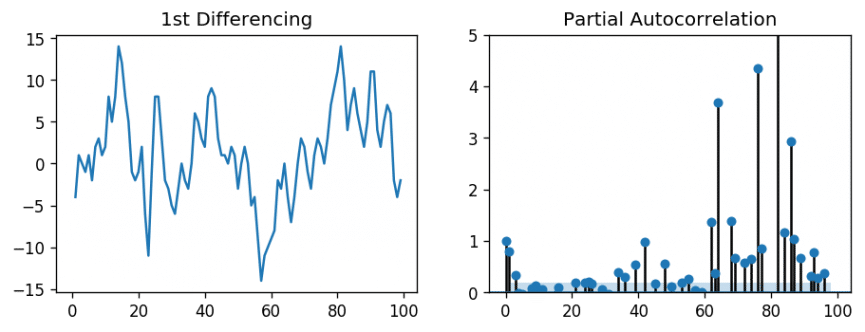

<br>

You can observe that the PACF lag 1 is quite significant since is well above the significance line. Lag 2 turns out to be significant as well, slightly managing to cross the significance limit (blue region). But I am going to be conservative and tentatively fix the p as 1.


https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

AC, PAC, PACF, AR, MA, ARIMA

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html

In [13]:
from statsmodels.tsa.stattools import pacf

ts = cria_ts()

p,c = pacf(x=ts.values, nlags=len(ts.values), alpha=0.95)

print('PACF: ', p, '\n',
      'Confidence Interval: ', c)


PACF:  [ 1.00000000e+00 -4.55852404e-02 -9.28910239e-02  5.66400477e-02
 -1.23557048e-02 -6.77413751e-02 -6.02535441e-02 -3.34588492e-02
 -1.74188897e-01  3.18848000e-02 -8.70130712e-03 -5.16792020e-02
 -4.35847405e-02 -7.85055918e-02 -8.13722450e-02 -1.87828260e-01
  1.62467292e-02  3.01780176e-02 -1.55469395e-01 -1.32008715e-01
  9.67678550e-02 -9.31954843e-02 -5.78179337e-02  3.85162382e-02
  1.91504698e-01 -2.85578487e-01 -7.35608858e-02  2.71327329e-02
 -2.21476949e-01 -9.33644515e-02 -5.65567581e-02 -6.84821349e-02
 -1.87583762e-01  3.16710846e-01 -7.44174345e-02  1.27852138e-01
 -1.25161629e-01  1.40501494e-02 -3.66616292e-02 -8.66277394e-02
 -6.38589061e-02 -3.85764991e-01 -1.42676357e-01 -2.01421440e-01
 -1.19122450e-01 -2.90137822e-02 -2.86407515e-01  2.67692976e-02
  1.65172058e-02 -1.02519425e-02 -5.35597375e-01 -8.91651790e-02
 -7.86535648e-01 -2.90908618e+00  1.41454644e+00  7.57808039e-01
  2.77993897e-01  3.22960900e-01  1.91196374e-01  1.38006789e-01
 -1.59990162e-01  

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1350: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


Notes

Based on simulation evidence across a range of low-order ARMA models, **the best methods based on root MSE are Yule-Walker (MLW), Levinson-Durbin (MLE) and Burg, respectively.** **The estimators with the lowest bias included included these three in addition to OLS and OLS-unbiased.**

Yule-Walker (unbiased) and Levinson-Durbin (unbiased) performed consistently worse than the other options.


https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

Docs » User Guide » 6. Tips to using auto_arima

https://alkaline-ml.com/pmdarima/tips_and_tricks.html


# 6. Tips to using auto_arima

<br>

6.1. Understand p, d, and q

ARIMA models are made up of three different terms:

- p: The order of the auto-regressive (AR) model (i.e., the number of lag observations)
- d: The degree of differencing.
- q: The order of the moving average (MA) model. This is essentially the size of the “window” function over your time series data.

<br>

# 6.1.2. Enforcing stationarity





False


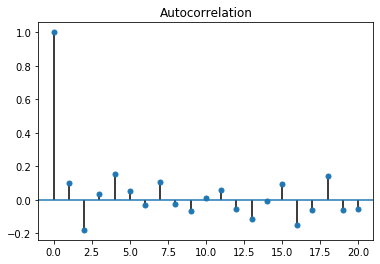

p-value:  0.01 
 Should Diff:  False


In [9]:
import pmdarima as pm

ts = cria_ts()

p, s = checa_estacionariedade(ts.values, return_p_value=True, acf=True)
print('p-value: ', p,'\n',
      'Should Diff: ', s)

In [13]:
n_adf = ndiffs(ts.values, test='adf')
n_adf

0

In [18]:
n_adf = estima_n_diff(ts.values, 'adf')
n_adf

0

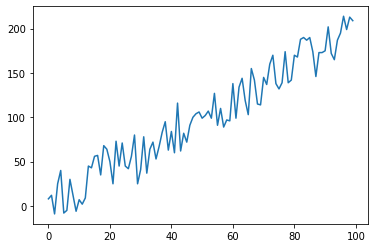

In [34]:
l=[]
for i in range(100):
  l.append(i*2 + 3*((-1)**i) - randint(-30, 30))
ts = pd.Series(l)
plt.plot(ts)

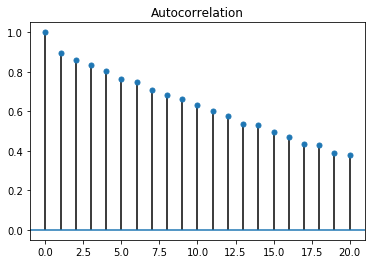

In [35]:
pm.plot_acf(ts)

False


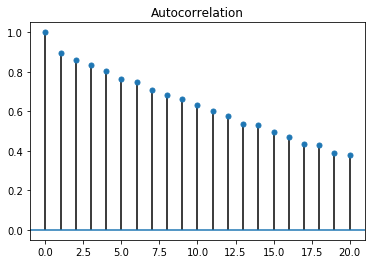

p-value:  0.01 
 Should Diff:  False


In [36]:

#estima_n_diff(ts.values, 'adf')
p, s = checa_estacionariedade(ts.values, return_p_value=True, acf=True)
print('p-value: ', p,'\n',
      'Should Diff: ', s)